<h1 style='color: green; font-size: 36px; font-weight: bold;'>Data Science - Regressão Linear II</h1>

# <font color='red' style='font-size: 30px;'>1.2 Conhecendo o Dataset</font>
<hr style='border: 2px solid red;'>

## Importando a biblioteca pandas

https://pandas.pydata.org/

In [71]:
import pandas as pd

## O Dataset e o Projeto
<hr>

### Descrição:
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify; text-indent: 35px;'>O mercado imobiliário vem sendo objeto de diversos estudos e pesquisas nos últimos tempos. A crise financeira que afeta a economia tem afetado significativamente os investimentos e ganhos advindos deste setor. Este cenário incentiva o aumento do interesse por estudos de previsão de demanda baseados em características deste mercado, dos imóveis e do entorno destes imóveis.</p>

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify; text-indent: 35px;'>Neste contexto o objetivo principal do nosso projeto é desenvolver um sistema de avaliação imobiliária utilizando a metodologia de regressões lineares que é uma das técnicas de machine learning.</p>

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify; text-indent: 35px;'>Nosso *dataset* é uma amostra aleatória de tamanho 5000 de imóveis disponíveis para venda no município do Rio de Janeiro.</p>

### Dados:
<ul style='font-size: 18px; line-height: 2; text-align: justify;'>
    <li><b>Valor</b> - Valor (R$) de oferta do imóvel</li>
    <li><b>Area</b> - Área do imóvel em m²</li>
    <li><b>Dist_Praia</b> - Distância do imóvel até a praia (km) (em linha reta)</li>
    <li><b>Dist_Farmacia</b> - Distância do imóvel até a farmácia mais próxima (km) (em linha reta)</li>
</ul>

## Leitura dos dados

In [72]:
dados = pd.read_csv('../Dados/dataset.csv', sep=';')

## Visualizar os dados

In [73]:
dados.head()

,Valor,Area,Dist_Praia,Dist_Farmacia
0,4600000,280,0.240925,0.793637
1,900000,208,0.904136,0.134494
2,2550000,170,0.059525,0.423318
3,550000,100,2.883181,0.525064
4,2200000,164,0.239758,0.192374


## Verificando o tamanho do dataset

In [74]:
dados.shape

(5000, 4)

In [75]:
len(dados)

5000

In [76]:
dados.shape[0]

5000

# <font color='red' style='font-size: 30px;'>1.3 Análises Preliminares</font>
<hr style='border: 2px solid red;'>

## Estatísticas descritivas

In [77]:
dados.describe().round(2)

,Valor,Area,Dist_Praia,Dist_Farmacia
count,5000.00,5000.00,5000.00,5000.00
mean,1402926.39,121.94,3.02,0.50
std,1883268.85,90.54,3.17,0.29
min,75000.00,16.00,0.00,0.00
25%,460000.00,70.00,0.44,0.24
50%,820000.00,93.00,1.48,0.50
75%,1590000.00,146.00,5.61,0.75
max,25000000.00,2000.00,17.96,1.00


Valor: max é 25 mi poderia ser muito.
Area: max é 2000 m2 o que pode ser um pouco demais
Nesse curso nao vamos tratar outliers mas no curso de pandas você aprendeu como fazer isso

## Matriz de correlação

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>O <b>coeficiente de correlação</b> é uma medida de associação linear entre duas variáveis e situa-se entre <b>-1</b> e <b>+1</b> sendo que <b>-1</b> indica associação negativa perfeita e <b>+1</b> indica associação positiva perfeita.</p>

In [78]:
dados.corr().round(3)

,Valor,Area,Dist_Praia,Dist_Farmacia
Valor,1.000,0.711,-0.367,-0.024
Area,0.711,1.000,-0.283,-0.031
Dist_Praia,-0.367,-0.283,1.000,0.026
Dist_Farmacia,-0.024,-0.031,0.026,1.000


Estamos interessados na linha Valor pois é minha var dep
A correlacao com a farmacia é bem baixa mas nao podemos inferir nada

Outro ponto que temos que olhar é a correlacao entre as var explicativas
maior corr é por volta de 0.3, o que é ok

# <font color='red' style='font-size: 30px;'>2.1 Comportamento da Variável Dependente (Y)</font>
<hr style='border: 2px solid red;'>

## Importando biblioteca seaborn
https://seaborn.pydata.org/
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>O Seaborn é uma biblioteca Python de visualização de dados baseada no matplotlib. Ela fornece uma interface de alto nível para desenhar gráficos estatísticos.</p>

In [79]:
import seaborn as sns

## Configurações de formatação dos gráficos

In [80]:
# palette -> Accent, Accent_r, Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens, Greens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, Pastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, RdBu_r, RdGy, RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, Spectral_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn, autumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cividis, cividis_r, cool, cool_r, coolwarm, coolwarm_r, copper, copper_r, cubehelix, cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r, gist_heat, gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r, gist_stern, gist_stern_r, gist_yarg, gist_yarg_r, gnuplot, gnuplot2, gnuplot2_r, gnuplot_r, gray, gray_r, hot, hot_r, hsv, hsv_r, icefire, icefire_r, inferno, inferno_r, jet, jet_r, magma, magma_r, mako, mako_r, nipy_spectral, nipy_spectral_r, ocean, ocean_r, pink, pink_r, plasma, plasma_r, prism, prism_r, rainbow, rainbow_r, rocket, rocket_r, seismic, seismic_r, spring, spring_r, summer, summer_r, tab10, tab10_r, tab20, tab20_r, tab20b, tab20b_r, tab20c, tab20c_r, terrain, terrain_r, viridis, viridis_r, vlag, vlag_r, winter, winter_r
sns.set_palette("Accent")
# style -> white, dark, whitegrid, darkgrid, ticks
sns.set_style("darkgrid")

## Box plot da variável *dependente* (y)

<img width='700px' src='../Dados/img/Box-Plot.png'>

https://seaborn.pydata.org/generated/seaborn.boxplot.html?highlight=boxplot#seaborn.boxplot

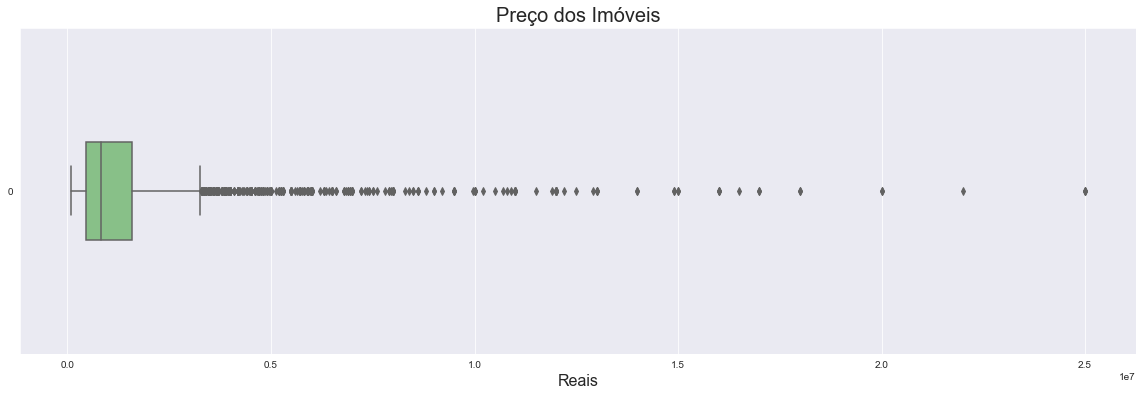

In [81]:
ax=sns.boxplot(data=dados['Valor'],orient='h', width=0.3)
ax.figure.set_size_inches(20, 6)
ax.set_title('Preço dos Imóveis', fontsize=20)
ax.set_xlabel('Reais', fontsize=16)
ax

A primeira vista parece que existem varios outliers, mas com essa quantidade nao podemos considera-los todos como outliers, talvez os ultimos 3 por exemplo. Uma forma de se tratar isso é separa a amostra por niveis de valor e rodar regressoes para cada nivel de preço

De qualquer forma esse boxplot esta indicando uma distribuicao assimetrica a direita

# <font color='red' style='font-size: 30px;'>2.2 Distribuição de Frequências</font>
<hr style='border: 2px solid red;'>

## Distribuição de frequências da variável *dependente* (y)

https://seaborn.pydata.org/generated/seaborn.distplot.html?highlight=distplot#seaborn.distplot

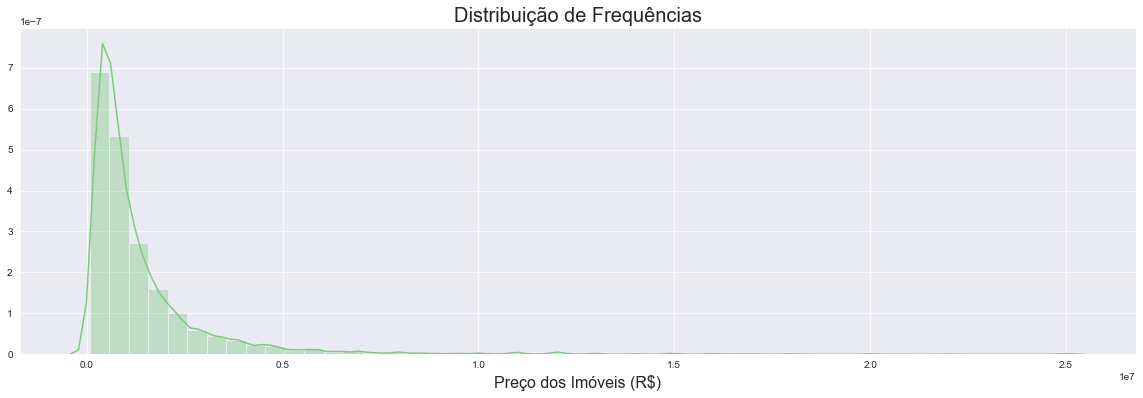

In [82]:
ax=sns.distplot(dados['Valor'])
ax.figure.set_size_inches(20, 6)
ax.set_title('Distribuição de Frequências', fontsize=20)
ax.set_xlabel('Preço dos Imóveis (R$)', fontsize=16)
ax

Esse tipo de variavel é bem comum, por exemplo renda: muita gente recebendo pouco e algumas recebendo muito

<img width='800px' src='../Dados/img/Box-Plot II.png'>

A gente se baseia em dist normal.
No nosso caso temos hist e distribuicao de frequência com assimetria à direita
Dados desssa natureza, podemos fazer uma transformação para termos uma distribuição simétrica

Deveriamos fazer o mesmo com as var explicativas

# <font color='red' style='font-size: 30px;'>2.3 Dispersão Entre as Variáveis</font>
<hr style='border: 2px solid red;'>

## Gráficos de dispersão entre as variáveis do dataset

## seaborn.pairplot

https://seaborn.pydata.org/generated/seaborn.pairplot.html?highlight=pairplot#seaborn.pairplot

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Plota o relacionamento entre pares de variáveis em um dataset.</p>

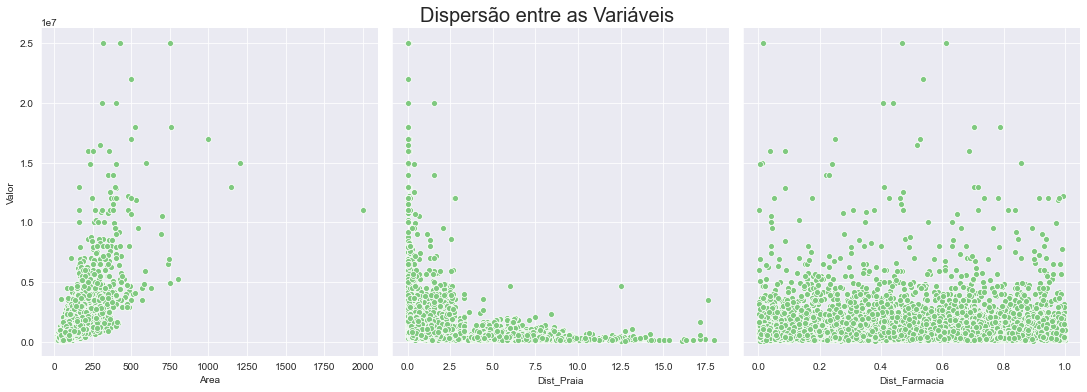

In [83]:
ax = sns.pairplot(dados, y_vars='Valor', x_vars=['Area', 'Dist_Praia', 'Dist_Farmacia'], height=5)
ax.fig.suptitle('Dispersão entre as Variáveis', fontsize=20, y=1.05)
ax

O primeiro grafico parece uma relacao explosiva
No segundo, talvez negativa
No terceiro, nada muito claro, tem pouca variacao

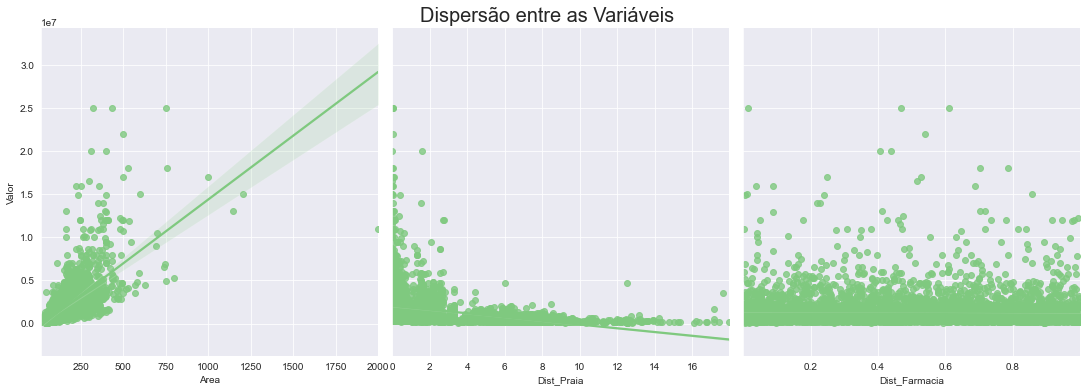

In [84]:
ax = sns.pairplot(dados, y_vars='Valor', x_vars=['Area', 'Dist_Praia', 'Dist_Farmacia'], kind='reg', height=5)
ax.fig.suptitle('Dispersão entre as Variáveis', fontsize=20, y=1.05)
ax


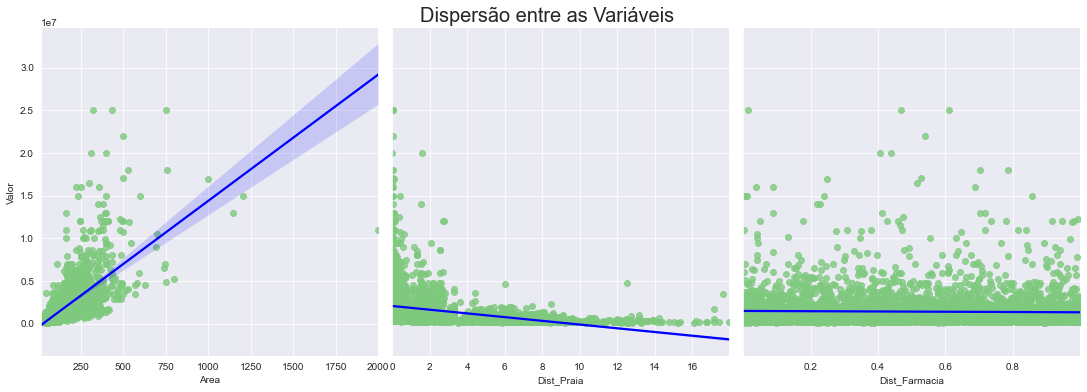

In [85]:
ax = sns.pairplot(dados, y_vars='Valor', x_vars=['Area', 'Dist_Praia', 'Dist_Farmacia'], kind='reg', height=5,
        plot_kws = {'line_kws' : {'color':'blue'}}, diag_kind = None)
ax.fig.suptitle('Dispersão entre as Variáveis', fontsize=20, y=1.05)
ax

Visto que isto ta uma bagunca e parece nao ter relacoes entre os dados, vamos transforma-los ao passar log nas variaveis

# <font color='red' style='font-size: 30px;'>3.1 Transformando os Dados</font>
<hr style='border: 2px solid red;'>

## Distribuição Normal
<hr>

### Por quê? 
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Testes paramétricos assumem que os dados amostrais foram coletados de uma população com distribuição de probabilidade conhecida. Boa parte dos testes estatísticos assumem que os dados seguem uma distribuição normal (t de Student, intervalos de confiança etc.).</p>



<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'></p>
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'></p>
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'></p>
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'></p>
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'></p>
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'></p>
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'></p>
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'></p>

## Importando biblioteca numpy

In [86]:
import numpy as np

## Aplicando a transformação logarítmica aos dados do *dataset*

https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.log.html

In [87]:
# como transformar
np.log(1)
# log de 1 é zero

0.0

In [88]:
np.log(0)

<ipython-input-88-f6e7c0610b57>:1: RuntimeWarning: divide by zero encountered in log
  np.log(0)


-inf

Como retorno, obteremos -inf, um infinito negativo porque é uma função que possui uma linha que sobe e vira à direita, sem tocar no eixo y. Ou seja, quando o x é igual a 0, não há valor para y e ela vai até o infinito. Isso é importante porque, se voltarmos às estatísticas descritivas, repare que temos o min (mínimo) de cada variável. Os valores de Valor e Area são aceitáveis, mas os de Dist_Praia e Dist_Farmacia são iguais a 0.0.

In [89]:
dados.describe().round(2)

,Valor,Area,Dist_Praia,Dist_Farmacia
count,5000.00,5000.00,5000.00,5000.00
mean,1402926.39,121.94,3.02,0.50
std,1883268.85,90.54,3.17,0.29
min,75000.00,16.00,0.00,0.00
25%,460000.00,70.00,0.44,0.24
50%,820000.00,93.00,1.48,0.50
75%,1590000.00,146.00,5.61,0.75
max,25000000.00,2000.00,17.96,1.00


Se passarmos esse log, teremos o -inf como retorno e isso é um problema, pois os dados serão cortados e não é o que queremos. Queremos que os imóveis com Dis_Praia mínima igual a 0.0 estejam na praia mesmo, queremos que eles estejam na base de dados. Inclusive os de Dis_Farmacia.

Para resolver esse problema, vamos voltar ao item "3.1 Transformando os Dados" e, na segunda célula de "Aplicando a transformação logarítmica aos dados do dataset"

In [90]:
# como Valor e Area nao tem zero, nao ha problema
dados['log_Valor'] = np.log(dados['Valor'])
dados['log_Area'] = np.log(dados['Area'])
# como Dist_Praia e Dist_Farmacia tem zero, ha problema
# asiciono 1 a todos valors
dados['log_Dist_Praia'] = np.log(dados['Dist_Praia'] + 1)
dados['log_Dist_Farmacia'] = np.log(dados['Dist_Farmacia'] + 1)

Para resolver o nosso problema e evitar a perda de dados, somamos um (+ 1) a todos os valores de Dist_Praia e Dist_Farmacia. Assim, não alteraremos a variação dessa variável. Só passaremos ao patamar superior. E, quando passarmos o log, os valores que aparecem como 0.0 na tabela, serão igual a 1, então será 0.0, considerando o retorno que obtivemos quando executamos a primeira célula de "Aplicando a transformação logarítmica aos dados do dataset" com: np.log(1)

In [91]:
dados.head()
# veja que o log das var foi incluido

,Valor,Area,Dist_Praia,Dist_Farmacia,log_Valor,log_Area,log_Dist_Praia,log_Dist_Farmacia
0,4600000,280,0.240925,0.793637,15.341567,5.634790,0.215857,0.584245
1,900000,208,0.904136,0.134494,13.710150,5.337538,0.644028,0.126187
2,2550000,170,0.059525,0.423318,14.751604,5.135798,0.057821,0.352991
3,550000,100,2.883181,0.525064,13.217674,4.605170,1.356655,0.422036
4,2200000,164,0.239758,0.192374,14.603968,5.099866,0.214916,0.175946


## Distribuição de frequências da variável *dependente transformada* (y)

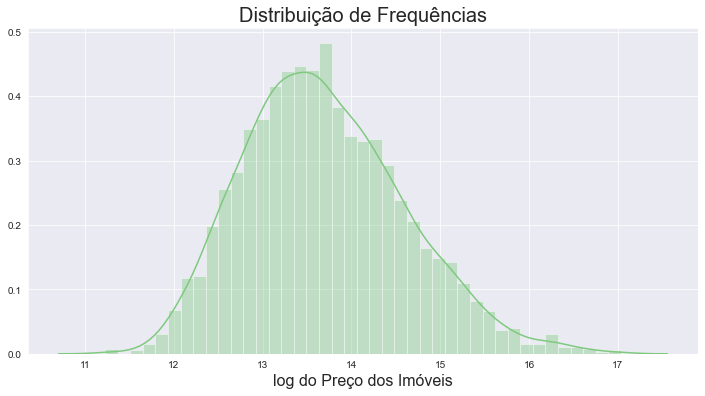

In [92]:
ax = sns.distplot(dados['log_Valor'])
ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição de Frequências', fontsize=20)
ax.set_xlabel('log do Preço dos Imóveis', fontsize=16)
ax
# muito melhor

# <font color='red' style='font-size: 30px;'>3.2 Verificando Relação Linear</font>
<hr style='border: 2px solid red;'>

## Gráficos de dispersão entre as variáveis transformadas do dataset

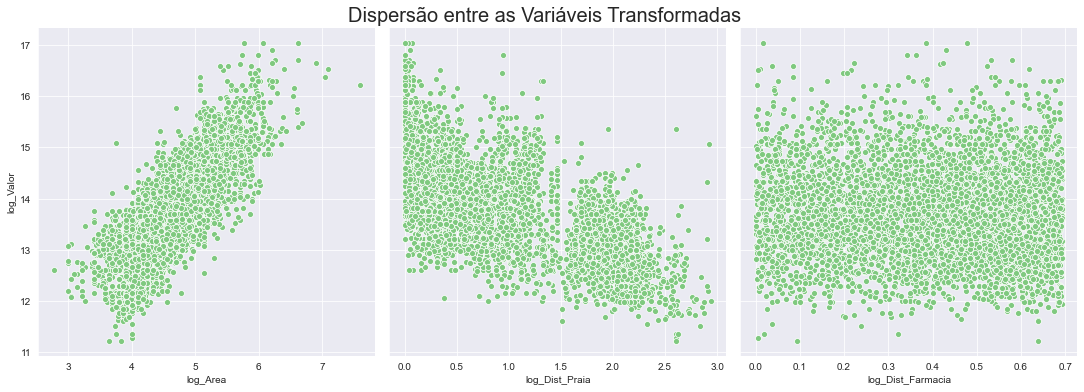

In [93]:
ax = sns.pairplot(dados, y_vars='log_Valor', x_vars=['log_Area', 'log_Dist_Praia', 'log_Dist_Farmacia'], height=5)
ax.fig.suptitle('Dispersão entre as Variáveis Transformadas', fontsize=20, y=1.05)
ax

, já percebemos uma relação linear crescente bastante forte. No de log_Dist_Praia, também é possível identificar uma relação linear para baixo, algo que já desconfiávamos — quanto mais distante da praia, menor o valor do imóvel —, uma correlação negativa. Já o de log_Dist_Farmacia, provavelmente apresentará um problema na hora de estimar a regressão, porque quase não há variação entre log_Valor e log_Dist_Farmacia, ele parece constante: os dados permanecem da mesma forma, tanto quando a variável log_Dist_Farmacia sobe, quanto quando ela desce, o comportamento da variável log_Valor permanece o mesmo.

Dist_Farmacia parece problematica, provavelmente sera eliminado do modelo apos os testes que faremos

# <font color='red' style='font-size: 30px;'>4.1 Criando os *Datasets* de Treino e Teste</font>
<hr style='border: 2px solid red;'>

## Importando o *train_test_split* da biblioteca *scikit-learn*

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [94]:
from sklearn.model_selection import train_test_split

## Criando uma Series (pandas) para armazenar o Preço dos Imóveis (y)

In [95]:
# vamo criar uma series para a var dep
y = dados['log_Valor']

## Criando um DataFrame (pandas) para armazenar as variáveis explicativas (X)

In [96]:
X = dados[['log_Area', 'log_Dist_Praia', 'log_Dist_Farmacia']]

## Criando os datasets de treino e de teste

In [97]:
# essa funcao precisa das var explicativas, var dep, especifica o arquivo de 
# teste (test size) e o de treino
# 0.2 significa que 20% dos dados é para teste e 80% para treino
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2811)

In [98]:
X_train

,log_Area,log_Dist_Praia,log_Dist_Farmacia
2661,5.945421,0.000000,0.382273
912,3.135494,0.972865,0.605015
3042,4.317488,1.794961,0.486594
141,3.401197,0.310455,0.599609
3854,5.676754,0.032193,0.101903
...,...,...,...
3657,5.075174,2.023480,0.333605
979,4.174387,2.296141,0.156465
2389,4.394449,1.367741,0.409727
447,3.951244,2.166841,0.217381


Ha 4 conjuntos de dados: 2 conjuntos contendo as explicativas e 2 as var dep

# Regresão Linear
<hr>

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>A análise de regressão diz respeito ao estudo da dependência de uma variável (a variável <b>dependente</b>) em relação a uma ou mais variáveis, as variáveis explanatórias, visando estimar e/ou prever o valor médio da primeira em termos dos valores conhecidos ou fixados das segundas.</p>


## scikit-learn (https://scikit-learn.org/stable/)

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>O *scikit-learn* é um módulo Python especializado em soluções para *machine learning*.</p>



<img width='800px' src='../Dados/img/Log-linear.png'>

## Importando a biblioteca statsmodels

https://www.statsmodels.org/stable/index.html

In [99]:
import statsmodels.api as sm

## Estimando o modelo com statsmodels

Vamos estimar o modelo com constante, e preciso incluir usando statsmodels

In [100]:
X_train_com_constante=sm.add_constant(X_train)

In [101]:
X_train
# veja que nao tem constant

,log_Area,log_Dist_Praia,log_Dist_Farmacia
2661,5.945421,0.000000,0.382273
912,3.135494,0.972865,0.605015
3042,4.317488,1.794961,0.486594
141,3.401197,0.310455,0.599609
3854,5.676754,0.032193,0.101903
...,...,...,...
3657,5.075174,2.023480,0.333605
979,4.174387,2.296141,0.156465
2389,4.394449,1.367741,0.409727
447,3.951244,2.166841,0.217381


In [102]:
X_train_com_constante
# agora tem

,const,log_Area,log_Dist_Praia,log_Dist_Farmacia
2661,1.0,5.945421,0.000000,0.382273
912,1.0,3.135494,0.972865,0.605015
3042,1.0,4.317488,1.794961,0.486594
141,1.0,3.401197,0.310455,0.599609
3854,1.0,5.676754,0.032193,0.101903
...,...,...,...,...
3657,1.0,5.075174,2.023480,0.333605
979,1.0,4.174387,2.296141,0.156465
2389,1.0,4.394449,1.367741,0.409727
447,1.0,3.951244,2.166841,0.217381


In [103]:
modelo_statsmodels=sm.OLS(y_train,X_train_com_constante,hasconst=True).fit()

# <font color='red' style='font-size: 30px;'>4.2 Avaliando o Modelo Estimado</font>
<hr style='border: 2px solid red;'>

In [104]:
modelo_statsmodels.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_Valor   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     5495.
Date:                Mon, 19 Jul 2021   Prob (F-statistic):               0.00
Time:                        10:39:30   Log-Likelihood:                -2044.9
No. Observations:                4000   AIC:                             4098.
Df Residuals:                    3996   BIC:                             4123.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 9.3417      0.060    154.734      0.000       9.223       9.460
log_Area              1.0580      0.012     89.320      0.000       1.035       1.081
log_Dist_Praia       -0.4905      0.009    -56.690      0.000      -0.508      -0.474
log_Dist_Farmacia    -0.0167      0.032     -0.521      0.603      -0.080       0.046
==============================================================================
Omnibus:                       64.751   Durbin-Watson:                   1.971
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              106.858
Skew:                           0.136   Prob(JB):                     6.25e-24
Kurtosis:                       3.753   Cond. No.                         47.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Avaliando as estatísticas de teste do modelo

In [105]:
print(modelo_statsmodels.summary())

                            OLS Regression Results                            
Dep. Variable:              log_Valor   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     5495.
Date:                Mon, 19 Jul 2021   Prob (F-statistic):               0.00
Time:                        10:39:30   Log-Likelihood:                -2044.9
No. Observations:                4000   AIC:                             4098.
Df Residuals:                    3996   BIC:                             4123.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 9.3417      0.06

Adj R2 penaliza a entrada de novas variaveis, ou seja ajusta pelos degrees of freedom
F statistic: checa conjuntamente os parametros do modelo, ele testa se aceita ou nao as var indep serem conjuntamente iguais a zero, se forem zero a reg nao faz sentido. Eu interpreto o F stat vendo a Prob(F stat), caso seja acima de 0.05 rejeito o modelo, ou seja ele nao é stat sig, ou seja conjuntamente as var indp nao explicam a variacao da var dependente. 

Test t é o equivalente to F-stat para cada variavel e o p-valor equivale o prob(F-stat). 
Vemos que log_Dist_Farmacia nao é statisticamente significante, e iremos a seguir tira-la do modelo.


Mesmo que o teste de significância da constante não passe, você deve manter a constante em seu modelo. A constante só deve ser retirada se você tiver certeza que sua reta de regressão passa realmente pela origem (Y = 0 e Xs = 0).
Se você não incluir a constante em seu modelo, estará forçando a linha de regressão a passar pela origem. Caso a reta ajustada não passe naturalmente pela origem, os coeficientes de regressão e as predições ficaram viesados no caso de você não incluir a constante.

# <font color='red' style='font-size: 30px;'>4.3 Modificando o Modelo e Avaliando Novamente o Ajuste</font>
<hr style='border: 2px solid red;'>

## Criando um novo conjunto de variáveis explicativas (X)

In [106]:
X = dados[['log_Area', 'log_Dist_Praia']]

## Criando os datasets de treino e de teste

In [107]:
X_train, X_teste, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2811)

In [108]:
X_train
# agora nao tem mais Dist_Farmacia

,log_Area,log_Dist_Praia
2661,5.945421,0.000000
912,3.135494,0.972865
3042,4.317488,1.794961
141,3.401197,0.310455
3854,5.676754,0.032193
...,...,...
3657,5.075174,2.023480
979,4.174387,2.296141
2389,4.394449,1.367741
447,3.951244,2.166841


## Estimando o modelo com o statsmodels

In [109]:
X_train_com_constante = sm.add_constant(X_train)
modelo_statsmodels = sm.OLS(y_train, X_train_com_constante, hasconst = True).fit()

## Avaliando as estatísticas de teste do novo modelo

In [110]:
print(modelo_statsmodels.summary())
# veja que o R2 nem mudou, em teoria deveria cair pois tirei uma variavel

                            OLS Regression Results                            
Dep. Variable:              log_Valor   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     8244.
Date:                Mon, 19 Jul 2021   Prob (F-statistic):               0.00
Time:                        10:39:31   Log-Likelihood:                -2045.1
No. Observations:                4000   AIC:                             4096.
Df Residuals:                    3997   BIC:                             4115.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              9.3349      0.059    158.

Custo de manter log dist praia é que meu coletor de dados iria ter que ver essa distancia, para nem ser usada/interpretada no modelo

#### Avaliando as estatísticas de teste do novo modelo
Teste de significância conjunta dos parâmetros
Prob (F-statistic) <= 0.05(OK)

Teste de significância conjunta dos parâmetros
P>|t|<=0.05(OK)

# <font color='red' style='font-size: 30px;'>5.1 Estimando o Modelo com os Dados de Treino</font>
<hr style='border: 2px solid red;'>

## Importando *LinearRegression* e *metrics* da biblioteca *scikit-learn*

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

https://scikit-learn.org/stable/modules/classes.html#regression-metrics

In [111]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics 

## Instanciando a classe *LinearRegression()*

In [112]:
modelo =  LinearRegression() 

## Utilizando o método *fit()* do objeto "modelo" para estimar nosso modelo linear utilizando os dados de TREINO (y_train e X_train)

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.fit

In [113]:
modelo.fit(X_train, y_train)

LinearRegression()

## Obtendo o coeficiente de determinação (R²) do modelo estimado com os dados de TREINO

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.score

### Coeficiente de Determinação - R²

O coeficiente de determinação (R²) é uma medida resumida que diz quanto a linha de regressão ajusta-se aos dados. É um valor entra 0 e 1.

$$R^2(y, \hat{y}) = 1 - \frac {\sum_{i=0}^{n-1}(y_i-\hat{y}_i)^2}{\sum_{i=0}^{n-1}(y_i-\bar{y}_i)^2}$$

In [114]:
print('R² = {}'.format(modelo.score(X_train, y_train).round(3)))

R² = 0.805


## Gerando previsões para os dados de TESTE (X_test) utilizando o método *predict()* do objeto "modelo"

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.predict

In [115]:
y_previsto = modelo.predict(X_teste)

## Obtendo o coeficiente de determinação (R²) para as previsões do nosso modelo

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html#sklearn.metrics.r2_score

In [116]:
print('R² = %s' % metrics.r2_score(y_test, y_previsto).round(3))
# R2 bem proximo do que encontramos no nossos dados de treino

R² = 0.79


# <font color='red' style='font-size: 30px;'>5.2 Obtendo Previsões Pontuais</font>
<hr style='border: 2px solid red;'>

Continuando com os valores de teste

## Dados de entrada

In [117]:
entrada = X_test[0:1]
# to pegando o primeiro registro do nosso dataset de teste e vo utiliza-lo para fazer a previsao
entrada

,log_Area,log_Dist_Praia,log_Dist_Farmacia
1006,5.273,1.282769,0.546323


In [118]:
X_teste.head(1)

,log_Area,log_Dist_Praia
1006,5.273,1.282769


## Gerando previsão pontual

In [124]:
entrada = X_teste[0:1]

In [128]:
modelo.predict(entrada)[0]
# prediz um valor de 14,28 reais do imovel, parece baixo ne?
# mas esse valor esta em log

14.28482006184788

## Invertendo a transformação para obter a estimativa em R$

https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.exp.html

In [130]:
np.exp(modelo.predict(entrada)[0]) 
# ou seja o valor é de 1,598,889 reais

1598889.784779439

#### Ignore até "criando um simulador simples"
Estou so testando

In [142]:
entrada = X_teste

In [143]:
modelo.predict(entrada)

array([14.28482006, 12.6280961 , 13.20913208, 13.6242716 , 13.22787316,
       13.27800316, 13.80046576, 13.83314631, 13.77018269, 13.48296069,
       14.73204577, 12.94736789, 14.2737596 , 15.13386086, 14.3489754 ,
       12.66265579, 13.85803484, 13.77484651, 14.30413689, 13.93460358,
       13.65707454, 13.75758226, 14.6925807 , 13.96050145, 13.11851101,
       13.6207634 , 14.92941399, 13.5151223 , 13.43142786, 14.48737387,
       13.72071882, 14.08686232, 12.47456952, 14.44505158, 13.17072614,
       13.67675545, 12.84497129, 13.85434702, 15.18514439, 14.33028731,
       14.29345091, 13.17395138, 13.55833468, 14.70682649, 13.56308071,
       13.13638382, 13.58379498, 12.6347748 , 12.55614667, 13.69723811,
       12.54756937, 12.42367042, 14.79751551, 13.27694564, 12.68316679,
       12.99655949, 12.32955472, 14.18124251, 13.87965356, 13.81403907,
       15.65934431, 13.27535358, 15.17668729, 13.58686728, 14.24247   ,
       12.93446823, 13.14813831, 12.97521305, 13.30386746, 15.12

In [144]:
np.exp(modelo.predict(entrada))

array([ 1598889.78477944,   305008.85932808,   545322.19478484,
         825935.19996626,   555638.48734651,   584202.62509271,
         985067.80643188,  1017792.17825451,   955684.09449444,
         717092.90809054,  2500611.26521667,   419730.40427345,
        1581302.77170446,  3737250.94795814,  1704829.04761196,
         315734.13268904,  1043441.39257691,   960151.63664261,
        1630075.50197329,  1126474.70337194,   853477.56522971,
         943717.61140724,  2403846.43874041,  1156029.04042051,
         498077.52385772,   823042.73361492,  3046225.96142398,
         740530.64599388,   681075.10379172,  1957882.07179152,
         909562.34553796,  1311736.40182436,   261599.3765439 ,
        1876749.00403706,   524775.66218591,   870441.16559663,
         378878.66701821,  1039600.45055494,  3933909.96190802,
        1673264.9057719 ,  1612749.28441632,   526470.91982761,
         773232.20437295,  2438336.21422321,   776910.70933618,
         507059.59553655,   793171.68837

In [145]:
entrada.shape[0]

1000

In [147]:
dados.shape[0]

5000

In [149]:
y_train.shape[0]

4000

In [152]:
y_previsto.shape[0]

1000

In [153]:
y_test.shape[0]

1000

In [155]:
entrada = X_train
entrada.shape[0]

4000

In [156]:
dados.head()

,Valor,Area,Dist_Praia,Dist_Farmacia,log_Valor,log_Area,log_Dist_Praia,log_Dist_Farmacia
0,4600000,280,0.240925,0.793637,15.341567,5.634790,0.215857,0.584245
1,900000,208,0.904136,0.134494,13.710150,5.337538,0.644028,0.126187
2,2550000,170,0.059525,0.423318,14.751604,5.135798,0.057821,0.352991
3,550000,100,2.883181,0.525064,13.217674,4.605170,1.356655,0.422036
4,2200000,164,0.239758,0.192374,14.603968,5.099866,0.214916,0.175946


## Criando um simulador simples

In [136]:
Area = 250
Dist_Praia = 1
entrada = [[np.log(Area), np.log(Dist_Praia + 1)]]

print('R$ {0: 2f}'.format(np.exp(modelo.predict(entrada)[0])))

R$  2777292.840312


# <font color='red' style='font-size: 30px;'>5.3 Interpretação dos Coeficientes Estimados</font>
<hr style='border: 2px solid red;'>

## Obtendo o intercepto do modelo

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>O <b>intercepto</b> representa o efeito médio em $Y$ (Preço do Imóveis) tendo todas as variáveis explicativas excluídas do modelo. No caso do modelo log-linear este coeficiente deve ser transformado com o uso da função exponencial para ser apresentado em R$.</p>

Muitas vezes em algum projeto estamos interessados em medir qual é o efeito das variáveis de maneira individual, e assim descobrir qual é mais significativa para o seu negócio.

Começaremos pelo intercepto, a constante que criamos. O intercepto representa o efeito médio em Y (preço do Imóvel) tendo todas as variáveis explicativas excluídas do modelo. No caso do modelo log-linear, este coeficiente deve ser transformado com o uso da função exponencial para ser apresentado em reais(R$). Para obter o intercepto, escreveremos:

In [158]:
modelo.intercept_
# igual a tabela de output, mas ta em log

9.334916409800332

In [159]:
np.exp(modelo.intercept_)
# 11326 reais é o valor médio, retirado o efito de todas as outras variaveis, no caso X2 e X3

11326.681428069882

## Obtendo os coeficientes de regressão

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>Os <b>coeficientes de regressão</b> $\beta_2$ e $\beta_3$ são conhecidos como <b>coeficientes parciais de regressão</b> ou <b>coeficientes parciais angulares</b>. </p>

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>Um aspecto interessante do modelo log-linear, que o tornou muito utilizado nos trabalhos aplicados, é que os coeficientes angulares $\beta_2$ e $\beta_3$ medem as elasticidades de Y em relação a $X_2$ e $X_3$, isto é, a variação percentual de Y correspondente a uma dada variação percentual (pequena) em $X_2$ e $X_3$.</p>

Agora começaremos a obter os coeficientes de regressão, também conhecidos como coeficientes parciais angulares. Esse tipo de modelo é muito utilizado em estudos econômicos, pois eles medem o que chamamos de elasticidade da variável dependente em relação às variáveis explicativas. A variação percentual de Y corresponde a uma dada variação percentual (pequena) em X2 e X3. Para obter esses coeficientes de forma simples, escreveremos:

In [161]:
modelo.coef_
# os dois coeficientes

array([ 1.05807818, -0.49061226])

## Confirmando a ordem das variáveis explicativas no DataFrame

In [162]:
X.columns

Index(['log_Area', 'log_Dist_Praia'], dtype='object')

## Criando uma lista com os nomes das variáveis do modelo

In [166]:
index = ['Intercepto','log Área', 'log Distância até a Praia']

## Criando um DataFrame para armazenar os coeficientes do modelo

https://docs.scipy.org/doc/numpy/reference/generated/numpy.append.html?#numpy.append

In [167]:
# coef estimados
pd.DataFrame(data=np.append(modelo.intercept_, modelo.coef_), index=index, columns=['Parâmetros'])

,Parâmetros
Intercepto,9.334916
log Área,1.058078
log Distância até a Praia,-0.490612


## Interpretação dos Coeficientes Estimados

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>
<b>Intercepto</b> → Excluindo o efeito das variáveis explicativas ($X_2=X_3=0$) o efeito médio no Preço dos Imóveis seria de <b>R$ 11.326,68</b> (exp[9.334916]).
</p>

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>
<b>Área (m²)</b> → Mantendo-se o valor de $X_3$ (Distância até a Praia) constante, um acréscimo de 1% na Área de um imóvel gera, em média, um acréscimo de <b>1.06%</b> no Preço do Imóvel.
</p>

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>
<b>Distância até a Praia (km)</b> → Mantendo-se o valor de $X_2$ (Área) constante, um acréscimo de 1% na Distância de um imóvel até a praia gera, em média, um decréscimo de <b>0.49%</b> no Preço do Imóvel.
</p>

# <font color='red' style='font-size: 30px;'>5.4 Análises Gráficas dos Resultados do Modelo</font>
<hr style='border: 2px solid red;'>

## Gerando as previsões do modelo para os dados de TREINO

In [168]:
# estamos comparando o dado real vs dado predictes para os dados de treino
y_previsto_train = modelo.predict(X_train)

## Gráfico de dispersão entre valor estimado e valor real

https://seaborn.pydata.org/generated/seaborn.scatterplot.html

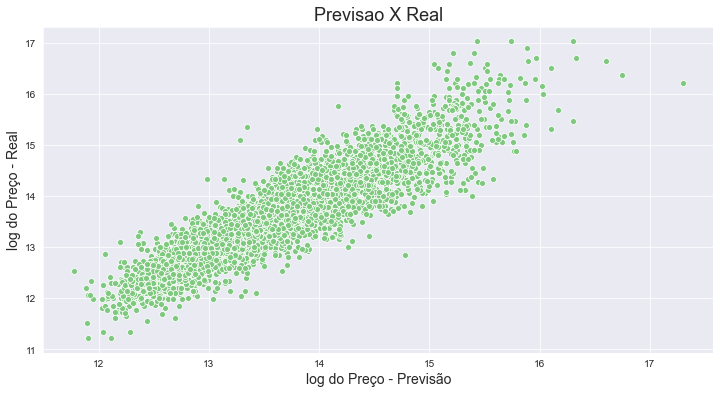

In [169]:
ax = sns.scatterplot(x=y_previsto_train, y=y_train)
ax.figure.set_size_inches(12, 6)
ax.set_title('Previsao X Real', fontsize=18)
ax.set_xlabel('log do Preço - Previsão', fontsize=14)
ax.set_ylabel('log do Preço - Real', fontsize=14)
ax

A ideia é ter uma reta, quanto mais proximo melhor meu modelo.
Para ajustar melhor precisariamos de mais variaveis
Veja que no final da curva temos um comportamento mais explosivo, ou seja para imoveis de valor mais elevado, o que remonta nossos problemas iniciais de assimetria das var. Teriamos que adicionar mais fatores em nosso modelo para account para isso

## Obtendo os resíduos

In [171]:
# residuo é nosso valor real - o valor previsto que é o que nao consiguimos prever
residuo = y_train - y_previsto_train

## Plotando a distribuição de frequências dos resíduos

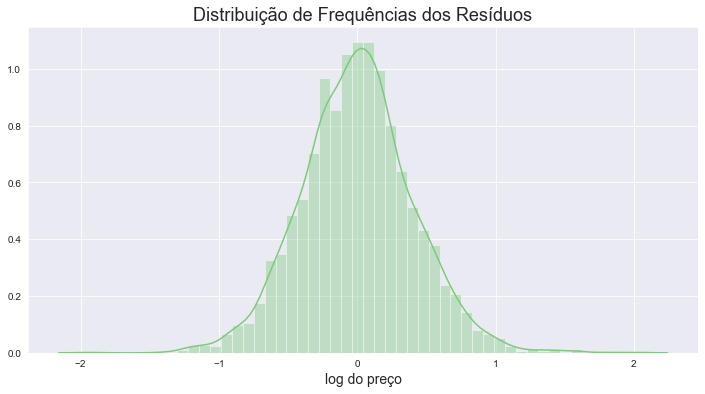

In [172]:
ax = sns.distplot(residuo)
ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição de Frequências dos Resíduos', fontsize=18)
ax.set_xlabel('log do preço', fontsize=14)
ax

Se nao tivessemos isso teriamos um problema.
Poderiamos ver a variancia do residuo também (curso passado)

É importante frisar que este se trata de um estudo, e não de um modelo a ser usado comercialmente, que precisaria de mais variáveis e elementos para operar de maneira funcional. Contudo, conseguimos antever qual seria o comportamento adequado para que um modelo estimativo nos fornecesse informações seguras, e para este fim, nosso projeto cabe perfeitamente.

In [175]:
# podemos fazer um teste de normalidade

Os resíduos do modelo são obtidos através da subtração entre o valor observado da variável dependente (valor real) e o valor previsto pelo modelo

Para plotarmos a distribuição de frequências dos resíduos, podemos utilizar a função distplot(), da biblioteca seaborn

Quando plotamos a dispersão entre o valor real da variável dependente e os valores previstos pelo modelo, esperamos encontrar uma relação linear bem ajustada (reta)